# Import Libraries and Load Wine Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agglomerative Clustering: Single, Complete, Average Linkages

In [2]:
linkages = ['single', 'complete', 'average']
agglo_models = {}
silhouette_scores = {}

for linkage_method in linkages:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    agglo_models[linkage_method] = (model, labels)
    silhouette_scores[linkage_method] = score
    print(f"Agglomerative Clustering with {linkage_method} linkage Silhouette Score: {score:.3f}")

Agglomerative Clustering with single linkage Silhouette Score: 0.183
Agglomerative Clustering with complete linkage Silhouette Score: 0.204
Agglomerative Clustering with average linkage Silhouette Score: 0.158


# Plot Agglomerative Clustering Results

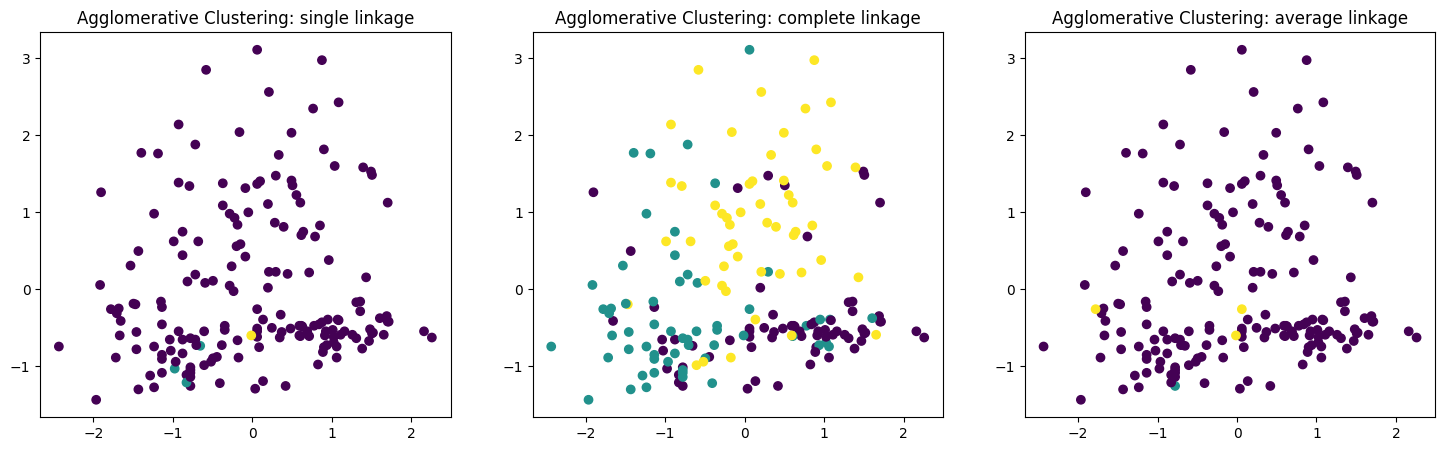

In [3]:
plt.figure(figsize=(18, 5))
for i, linkage_method in enumerate(linkages, 1):
    plt.subplot(1, 3, i)
    plt.title(f'Agglomerative Clustering: {linkage_method} linkage')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_models[linkage_method][1])
plt.show()

# Dendrogram Visualization (Ward Linkage)

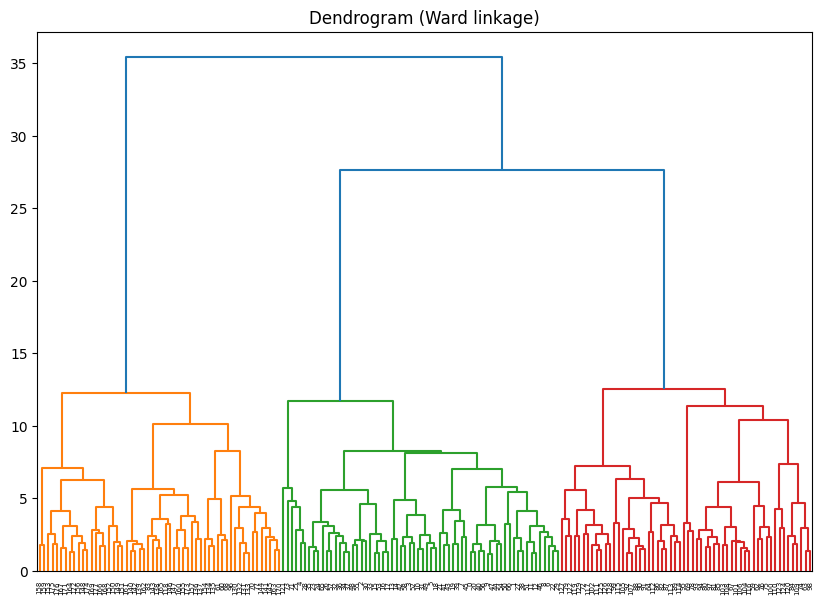

In [4]:
Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Ward linkage)")
dendrogram(Z)
plt.show()

# Divisive Clustering Implementation (using recursive KMeans splitting)


In [5]:
def divisive_clustering(X, n_clusters=3):
    clusters = {0: X}
    cluster_labels = np.zeros(X.shape[0], dtype=int)

    while len(clusters) < n_clusters:
        largest_cluster = max(clusters, key=lambda k: len(clusters[k]))
        data_to_split = clusters[largest_cluster]

        kmeans = KMeans(n_clusters=2, random_state=0).fit(data_to_split)
        labels = kmeans.labels_

        del clusters[largest_cluster]
        new_cluster_id1 = max(clusters.keys(), default=0) + 1
        new_cluster_id2 = new_cluster_id1 + 1
        clusters[new_cluster_id1] = data_to_split[labels == 0]
        clusters[new_cluster_id2] = data_to_split[labels == 1]

        indices = np.where(cluster_labels == largest_cluster)[0]
        cluster_labels[indices[labels == 0]] = new_cluster_id1
        cluster_labels[indices[labels == 1]] = new_cluster_id2

    return cluster_labels

div_labels = divisive_clustering(X_scaled, n_clusters=3)


# Plot Divisive Clustering Results and Silhouette Score

Divisive Clustering Silhouette Score: 0.268


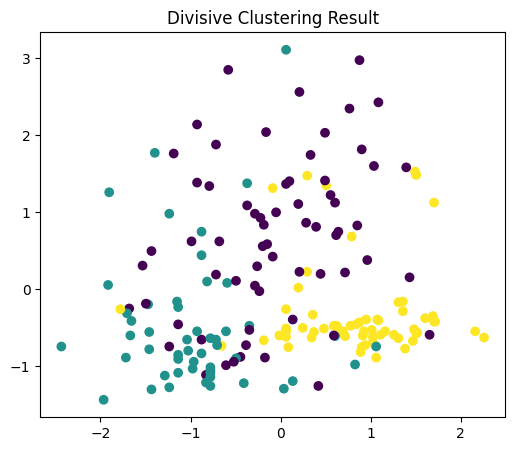

In [6]:
div_score = silhouette_score(X_scaled, div_labels)
print(f"Divisive Clustering Silhouette Score: {div_score:.3f}")

plt.figure(figsize=(6, 5))
plt.title("Divisive Clustering Result")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=div_labels)
plt.show()